# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('/users/youcefdjeddar/downloads//human_body_temperature.csv')

In [281]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [287]:
temp = df.loc[:,'temperature']

In [288]:
temp.head()

0    99.3
1    98.4
2    97.8
3    99.2
4    98.0
Name: temperature, dtype: float64

In [289]:
mean = temp.mean()
median = temp.median()
std = temp.std()

In [290]:
np.percentile(temp, [25,50,75])

array([97.8, 98.3, 98.7])

In [291]:
#-------------------------------------------------------
#     Question1: is the data normally distributed?

In [292]:
temp.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [293]:
x = np.sort(temp)
y = np.arange(1, len(x)+1) / len(x)

Text(0.5,1,'CDF')

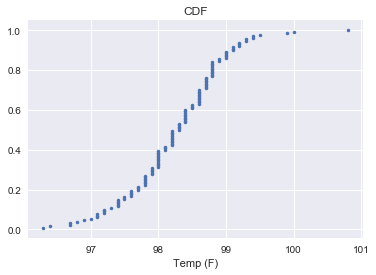

In [294]:
sns.set()
plt.plot(x, y, marker = '.', linestyle ='none')
plt.xlabel('Temp (F)')
plt.title('CDF')

In [295]:
bin_values = np.arange(start=min(temp), stop=max(temp), step=0.5)
p=norm.pdf(temp, mean, std)

/Users/youcefdjeddar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Temperature')

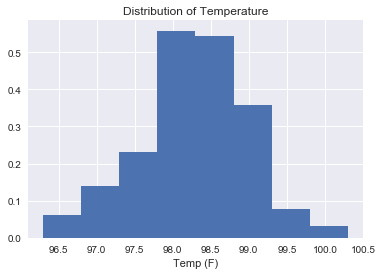

In [296]:
plt.hist(temp, bins=bin_values, normed=True, stacked=True)
plt.xlabel('Temp (F)')
plt.title('Distribution of Temperature')

Text(0.5,0,'Temp (F)')

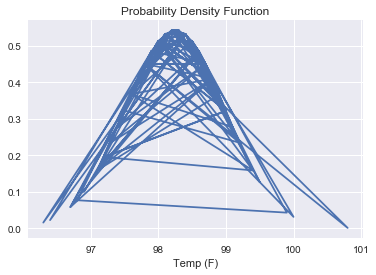

In [297]:
plt.plot(temp, p)
plt.title ('Probability Density Function')
plt.xlabel('Temp (F)')
#The PDF is a bit weird though

In [298]:
p1, p = scipy.stats.normaltest(temp)
print(p)
#Because p is > 0.05 then the data is normally distributed

0.2587479863488254


In [299]:
#From the CDF, the Histogram and the PDF, it looks like the data is normally distributed

In [300]:
#-------------------------------------------------------
#     Question2: is the sample size large?

In [329]:
#Hypothesis 0: the true mean is 98.6
#Hypothesis 1: the true mean is NOT 98.6

In [301]:
len(temp)

130

In [302]:
#It seems to be large enough.

In [303]:
#-------------------------------------------------------
#     Question3: is the true mean really 98.6 degrees F?

In [330]:
#A/ Bootstrap hypothesis test
#Hypothesis 0: the true mean is 98.6
#Hypothesis 1: the true mean is NOT 98.6

In [305]:
temp1 = np.array(temp)

In [306]:
bs_sample = np.random.choice(temp1, size = len(temp1))

In [307]:
np.mean(bs_sample)

98.30692307692308

In [308]:
#The mean is slightly different here

In [309]:
#Defining the ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x

    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

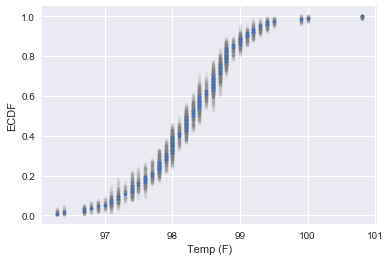

In [310]:
#Generating the plot for the bootstrap sample using the ECDF function
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(temp, size=len(temp))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(temp)
_ = plt.plot(x, y, '.')

# Make margins and label axes
_ = plt.xlabel('Temp (F)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [311]:
#We can clearly see that the mean has a range. Let's find it out

In [312]:
def bootstrap_replicate (data, func):
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)
    

In [313]:
bootstrap_replicate(temp, np.mean)

98.2146153846154

In [314]:
bs_array = np.empty(10000)
for i in range (10000):
    bs_array[i] = bootstrap_replicate(temp, np.mean)

/Users/youcefdjeddar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'PDF')

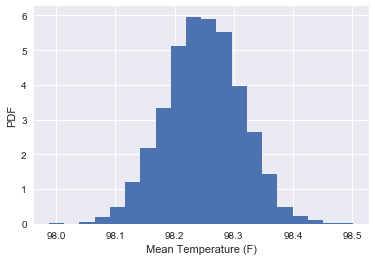

In [315]:
plt.hist(bs_array, bins=20, normed=True)
plt.xlabel('Mean Temperature (F)')
plt.ylabel('PDF')

In [316]:
#From the histogram we can see that the mean varies between 98.05 and 98.45

In [317]:
conf_int = np.percentile(bs_array, [2.5, 97.5])
conf_int

array([98.12307692, 98.37      ])

In [318]:
#The confidence interval above indicates that the mean is most likely to be in the conf_int range

In [331]:
#B/ Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

In [333]:
#I'd use the one-sample test since we are comparing the dataset to one single value (98.6F)
#I'd also opt for the t-test since the std is unkown.

In [353]:
#Let's find the t_statistics and the p_value:
t = stats.ttest_1samp(temp, 98.6)[0]
p = stats.ttest_1samp(temp, 98.6)[1]
print("T stat:", t)
print("P value:", p)

T stat: -5.4548232923645195
P value: 2.4106320415561276e-07


In [346]:
#Quantiles of the t-distribution corresponding
n = len(temp)
x = (stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1))
print(x)

(-3.3675464541818454, 3.367546454181878)


In [351]:
#It's been stated that in order to use a t-test the std must be unkown AND the population must be less than 30
#The two conditions are not met. Therefore let's use a z-test

In [ ]:
#a